In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(7)

In [3]:
# Read in data
file_path = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_D,color_E,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df = df.rename(columns={"depth": "total depth percentage", "x": "length", "y":"width", "z": "depth"})

In [5]:
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['carat', 'total depth percentage', 'table', 'price', 'length', 'width',
       'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [6]:
X = df.drop(columns=["price"]).values
X

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

In [7]:
y = df["price"].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [9]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
# Define the model
number_inputs = 26
number_hidden_nodes = 8

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

In [11]:
# Output layer
number_classes = 1

nn.add(Dense(units=number_classes, activation="linear"))

In [12]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 216       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])


In [14]:
# Fitting the model with linear dummy data
model_1 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43263176.0000 - mean_absolute_error: 4907.8110 - val_loss: 2956234.0000 - val_mean_absolute_error: 1606.7366
Epoch 2/100
1180/1180 [==============================] - 2s 2ms/step - loss: 41622776.0000 - mean_absolute_error: 4809.7397 - val_loss: 2835319.5000 - val_mean_absolute_error: 1575.7288
Epoch 3/100
1180/1180 [==============================] - 2s 2ms/step - loss: 38678428.0000 - mean_absolute_error: 4628.7510 - val_loss: 2679070.2500 - val_mean_absolute_error: 1532.3579
Epoch 4/100
1180/1180 [==============================] - 2s 2ms/step - loss: 35032464.0000 - mean_absolute_error: 4390.6104 - val_loss: 2514726.0000 - val_mean_absolute_error: 1480.6581
Epoch 5/100
1180/1180 [==============================] - 2s 2ms/step - loss: 31003898.0000 - mean_absolute_error: 4108.7954 - val_loss: 2360502.7500 - val_mean_absolute_error: 1423.4357
Epoch 6/100
1180/1180 [==============================] - 2s 2ms/step -

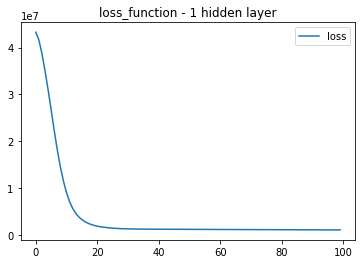

In [15]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [16]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [17]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 2s 2ms/step - loss: 40469048.0000 - mean_absolute_error: 4734.1421 - val_loss: 2396330.7500 - val_mean_absolute_error: 1442.9556
Epoch 2/100
1180/1180 [==============================] - 2s 2ms/step - loss: 17881954.0000 - mean_absolute_error: 2916.6458 - val_loss: 1904304.7500 - val_mean_absolute_error: 1200.2162
Epoch 3/100
1180/1180 [==============================] - 2s 2ms/step - loss: 5617757.0000 - mean_absolute_error: 1596.6520 - val_loss: 1733619.2500 - val_mean_absolute_error: 1095.1871
Epoch 4/100
1180/1180 [==============================] - 2s 2ms/step - loss: 2976678.7500 - mean_absolute_error: 1156.1134 - val_loss: 1635095.5000 - val_mean_absolute_error: 1065.2186
Epoch 5/100
1180/1180 [==============================] - 2s 2ms/step - loss: 2002276.2500 - mean_absolute_error: 946.3553 - val_loss: 1537061.1250 - val_mean_absolute_error: 1020.7516
Epoch 6/100
1180/1180 [==============================] - 4s 4ms/step - los

In [21]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4


nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_3 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43539324.0000 - mean_absolute_error: 4923.9834 - val_loss: 3000178.5000 - val_mean_absolute_error: 1617.6552
Epoch 2/100
1180/1180 [==============================] - 3s 2ms/step - loss: 43527208.0000 - mean_absolute_error: 4922.7598 - val_loss: 2996411.0000 - val_mean_absolute_error: 1616.4875
Epoch 3/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43515760.0000 - mean_absolute_error: 4921.5933 - val_loss: 2992640.0000 - val_mean_absolute_error: 1615.3245
Epoch 4/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43504252.0000 - mean_absolute_error: 4920.4282 - val_loss: 2988880.0000 - val_mean_absolute_error: 1614.1581ss: 43641868.0000 - mean_absolute_error: 49
Epoch 5/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43492740.0000 - mean_absolute_error: 4919.2637 - val_loss: 2985117.7500 - val_mean_absolute_error: 1612.9967
Epoch 6/100
1180/1180 [====

In [22]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 3

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_4 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 3s 2ms/step - loss: 24882624.0000 - mean_absolute_error: 3342.8586 - val_loss: 1048275.0000 - val_mean_absolute_error: 765.2968
Epoch 2/100
1180/1180 [==============================] - 3s 2ms/step - loss: 1976345.8750 - mean_absolute_error: 877.2889 - val_loss: 695085.4375 - val_mean_absolute_error: 487.0353
Epoch 3/100
1180/1180 [==============================] - 3s 2ms/step - loss: 1168272.0000 - mean_absolute_error: 670.8036 - val_loss: 743809.0625 - val_mean_absolute_error: 519.4664
Epoch 4/100
1180/1180 [==============================] - 3s 3ms/step - loss: 1085004.3750 - mean_absolute_error: 640.5240 - val_loss: 720155.6250 - val_mean_absolute_error: 506.3075
Epoch 5/100
1180/1180 [==============================] - 3s 3ms/step - loss: 1040379.0000 - mean_absolute_error: 612.0667 - val_loss: 647999.9375 - val_mean_absolute_error: 455.8847
Epoch 6/100
1180/1180 [==============================] - 3s 2ms/step - loss: 994532.625

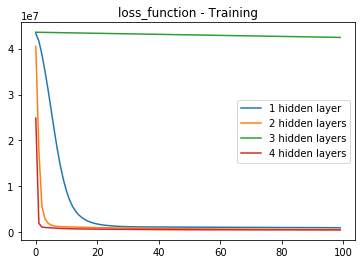

In [24]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.plot(model_3.history["loss"])
plt.plot(model_4.history["loss"])

plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers", "3 hidden layers", "4 hidden layers"])
plt.show()

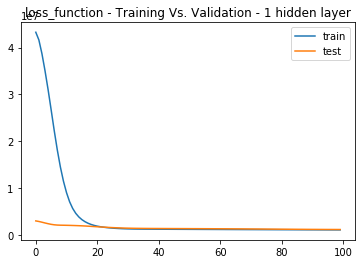

In [19]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

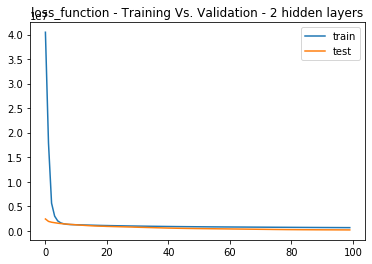

In [20]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

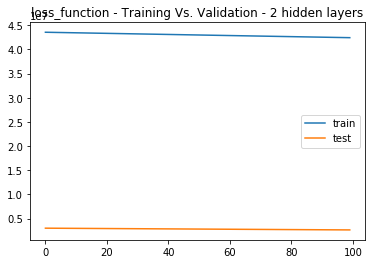

In [25]:
# Train vs test for deep net
plt.plot(model_3.history["loss"])
plt.plot(model_3.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 3 hidden layers")
plt.legend(["train", "test"])
plt.show()

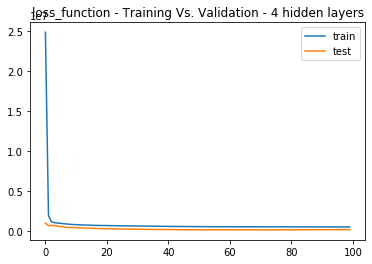

In [27]:
# Train vs test for deep net
plt.plot(model_4.history["loss"])
plt.plot(model_4.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 4 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [28]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 3

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(Dense(units=1, activation="linear"))
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_5 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 3s 2ms/step - loss: 43534724.0000 - mean_absolute_error: 4923.5337 - val_loss: 2996035.2500 - val_mean_absolute_error: 1616.3763
Epoch 2/100
1180/1180 [==============================] - 3s 2ms/step - loss: 43508492.0000 - mean_absolute_error: 4920.8599 - val_loss: 2988317.2500 - val_mean_absolute_error: 1613.9852
Epoch 3/100
1180/1180 [==============================] - 2s 2ms/step - loss: 43485264.0000 - mean_absolute_error: 4918.5005 - val_loss: 2980745.0000 - val_mean_absolute_error: 1611.6371
Epoch 4/100
1180/1180 [==============================] - 3s 2ms/step - loss: 43462224.0000 - mean_absolute_error: 4916.1543 - val_loss: 2973225.7500 - val_mean_absolute_error: 1609.2993
Epoch 5/100
1180/1180 [==============================] - 3s 2ms/step - loss: 43439288.0000 - mean_absolute_error: 4913.8198 - val_loss: 2965719.7500 - val_mean_absolute_error: 1606.9692
Epoch 6/100
1180/1180 [==============================] - 3s 2ms/step -

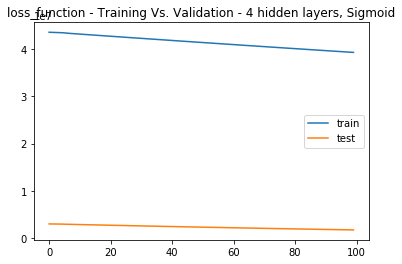

In [29]:
plt.plot(model_5.history["loss"])
plt.plot(model_5.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 4 hidden layers, Sigmoid")
plt.legend(["train", "test"])
plt.show()

In [30]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 3

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="softmax"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="softmax"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer4, activation="softmax"))

# Output layer
nn.add(Dense(units=1, activation="linear"))
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_6 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
1180/1180 [==============================] - 4s 4ms/step - loss: 43530728.0000 - mean_absolute_error: 4923.1230 - val_loss: 2995008.7500 - val_mean_absolute_error: 1616.0593
Epoch 2/100
1180/1180 [==============================] - 4s 3ms/step - loss: 43504508.0000 - mean_absolute_error: 4920.4507 - val_loss: 2986837.2500 - val_mean_absolute_error: 1613.5280
Epoch 3/100
1180/1180 [==============================] - 3s 3ms/step - loss: 43480536.0000 - mean_absolute_error: 4918.0176 - val_loss: 2979144.2500 - val_mean_absolute_error: 1611.1404
Epoch 4/100
1180/1180 [==============================] - 3s 3ms/step - loss: 43457292.0000 - mean_absolute_error: 4915.6499 - val_loss: 2971589.7500 - val_mean_absolute_error: 1608.7942
Epoch 5/100
1180/1180 [==============================] - 5s 4ms/step - loss: 43434288.0000 - mean_absolute_error: 4913.3115 - val_loss: 2964079.5000 - val_mean_absolute_error: 1606.4548
Epoch 6/100
1180/1180 [==============================] - 7s 6ms/step -

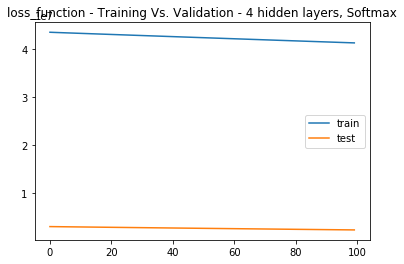

In [31]:
plt.plot(model_6.history["loss"])
plt.plot(model_6.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 4 hidden layers, Softmax")
plt.legend(["train", "test"])
plt.show()